# **Problem Statement**

Help an Indian multinational ridesharing company, predict whether a driver will be leaving the company or not based on their attributes like Demographics (city, age, gender etc.), Tenure information (joining date, Last Date) and Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income). Also, provide actionable Insights & Recommendations to retain drivers since the high churn among drivers could become a bigger problem as the companies get bigger.

In [1024]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1025]:
#importing data set

data = pd.read_csv('driver.csv')

In [1026]:
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [1027]:
data.tail()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


In [1028]:
data = data.drop(columns = 'Unnamed: 0')

In [1029]:
data.shape

(19104, 13)

In [1030]:
#data overiew - non-null counts and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [1031]:
#percentage of null values in each column

data.isnull().sum()*100/data.isnull().count()

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

# **Exploratory Data Analysis**

In [1032]:
#converting date columns to date dtype

data['MMM-YY'] = data['MMM-YY'].astype('datetime64')
data['Dateofjoining'] = data['Dateofjoining'].astype('datetime64')
data['LastWorkingDate'] = data['LastWorkingDate'].astype('datetime64')

In [1033]:
#grouping by Driver_ID and storing the sum of Total Business value and last values for all other fields

df = data.groupby('Driver_ID').last()
df['Total Business Value'] = data.groupby('Driver_ID')['Total Business Value'].sum()
# df['Avg Quarterly Rating'] = data.groupby('Driver_ID')['Quarterly Rating'].mean()
df.reset_index(inplace = True)

In [1034]:
df.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2


In [1035]:
df.shape

(2381, 13)

In [1036]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   MMM-YY                2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
dtypes: datetime64[ns](

In [1037]:
#percentage of null values in each column

df.isnull().sum()*100/df.isnull().count()

Driver_ID                0.000000
MMM-YY                   0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         32.129357
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

**Data Overview**

*Before Cleaning*
- 19104 rows and 13 columns

*After Cleaning*

- There are 2381 rows and 13 columns
- Each row represents the attributes of a driver (dependent variables) and their last working date (NaN if still working), independent variable.

**Data Types**
- Numerical(Continuous) variables - Age, Income, Total Business Value
- Numerical(Discrete) variables - Diver_ID, Gender, Education_Level, Joining Designation, Grade, Quarterly Rating
- Categorical variable - City
- Datetime variables - MMM-YY, Dateofjoining, LastWorkingDate

## **Non-Graphical Analysis**


In [1038]:
#number of unique values

df.nunique()

Driver_ID               2381
MMM-YY                    24
Age                       36
Gender                     2
City                      29
Education_Level            3
Income                  2339
Dateofjoining            869
LastWorkingDate          493
Joining Designation        5
Grade                      5
Total Business Value    1629
Quarterly Rating           4
dtype: int64

In [1039]:
df.describe(datetime_is_numeric=True)

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,2381.000000,2381,2381.000000,2381.000000,2381.00000,2381.000000,2381,1616,2381.000000,2381.000000,2.381000e+03,2381.000000
mean,1397.559009,2020-03-31 15:04:09.475010560,33.663167,0.410332,1.00756,59334.157077,2019-02-08 07:14:50.550189056,2019-12-21 20:59:06.534653440,1.820244,2.096598,4.586742e+06,1.427971
min,1.000000,2019-01-01 00:00:00,21.000000,0.000000,0.00000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-1.385530e+06,1.000000
25%,695.000000,2019-09-01 00:00:00,29.000000,0.000000,0.00000,39104.000000,2018-06-29 00:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000
50%,1400.000000,2020-06-01 00:00:00,33.000000,0.000000,1.00000,55315.000000,2019-07-21 00:00:00,2019-12-20 12:00:00,2.000000,2.000000,8.176800e+05,1.000000
75%,2100.000000,2020-12-01 00:00:00,37.000000,1.000000,2.00000,75986.000000,2020-05-02 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,4.173650e+06,2.000000
max,2788.000000,2020-12-01 00:00:00,58.000000,1.000000,2.00000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,9.533106e+07,4.000000
std,806.161628,NaN,5.983375,0.491997,0.81629,28383.666384,NaN,NaN,0.841433,0.941522,9.127115e+06,0.809839


In [1040]:
#target variable churn

df['churn'] = df['LastWorkingDate'].isna().apply(lambda x: 0 if x else 1)

In [1041]:
#checking column churn

df['churn'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: churn, dtype: float64

In [1042]:
#checking column Gender

df['Gender'].value_counts(normalize=True)

0.0    0.589668
1.0    0.410332
Name: Gender, dtype: float64

In [1043]:
#checking column City

df['City'].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

In [1044]:
#checking column Education_Level

df['Education_Level'].value_counts()

2    802
1    795
0    784
Name: Education_Level, dtype: int64

In [1045]:
#checking column Joining Designation

df['Joining Designation'].value_counts()

1    1026
2     815
3     493
4      36
5      11
Name: Joining Designation, dtype: int64

In [1046]:
#checking column Grade

df['Grade'].value_counts()

2    855
1    741
3    623
4    138
5     24
Name: Grade, dtype: int64

In [1047]:
#checking column Quarterly Rating

df['Quarterly Rating'].value_counts(normalize=True)

1    0.732465
2    0.152037
3    0.070559
4    0.044939
Name: Quarterly Rating, dtype: float64

## **Visual Analysis**


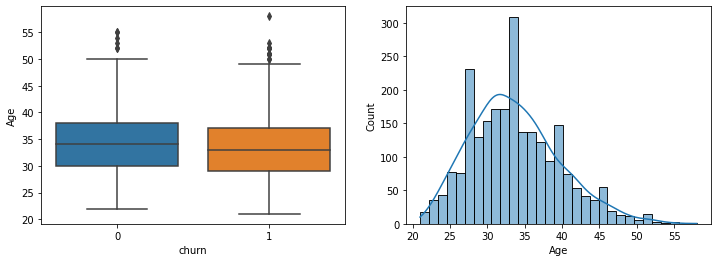

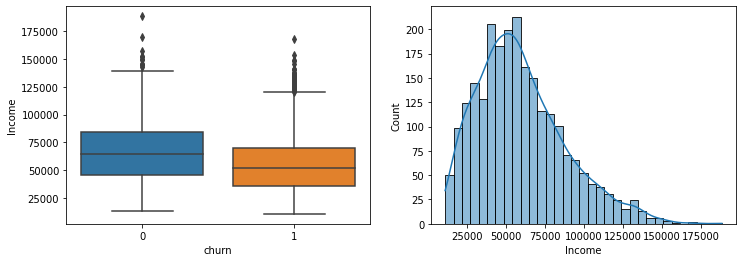

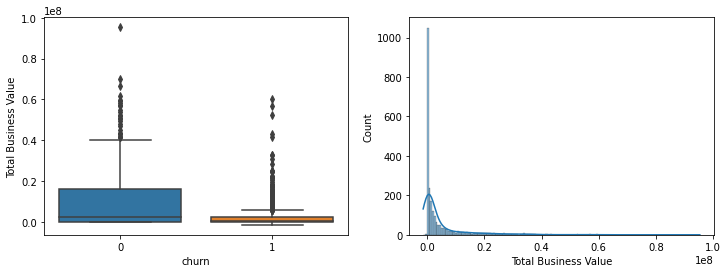

In [1048]:
#Distribution of numerical attributes

num_cols = ['Age', 'Income', 'Total Business Value']

for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.boxplot(data=df, y=col, x='churn')
    plt.subplot(122)
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

In [1049]:
df[['Total Business Value', 'churn']]

,Total Business Value,churn
0,1715580,1
1,0,0
2,350000,1
3,120360,1
4,1265000,0
...,...,...
2376,21748820,0
2377,0,1
2378,2815090,1
2379,977830,1


churn          0         1
Gender                    
0.0     0.324786  0.675214
1.0     0.316274  0.683726
All     0.321294  0.678706


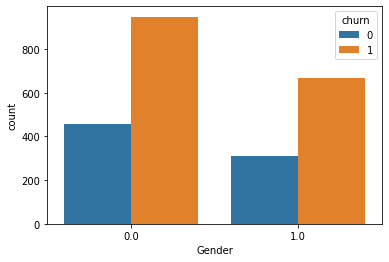

churn                   0         1
Education_Level                    
0                0.308673  0.691327
1                0.337107  0.662893
2                0.317955  0.682045
All              0.321294  0.678706


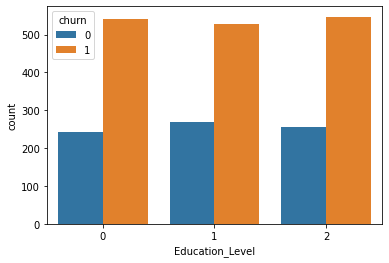

churn                       0         1
Joining Designation                    
1                    0.267057  0.732943
2                    0.312883  0.687117
3                    0.444219  0.555781
4                    0.388889  0.611111
5                    0.272727  0.727273
All                  0.321294  0.678706


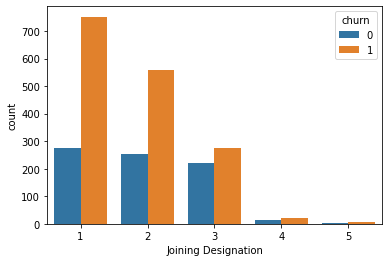

churn         0         1
Grade                    
1      0.195682  0.804318
2      0.298246  0.701754
3      0.459069  0.540931
4      0.492754  0.507246
5      0.458333  0.541667
All    0.321294  0.678706


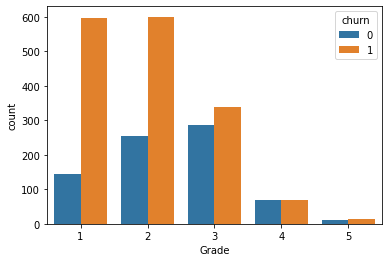

churn                    0         1
Quarterly Rating                    
1                 0.178899  0.821101
2                 0.596685  0.403315
3                 0.833333  0.166667
4                 0.906542  0.093458
All               0.321294  0.678706


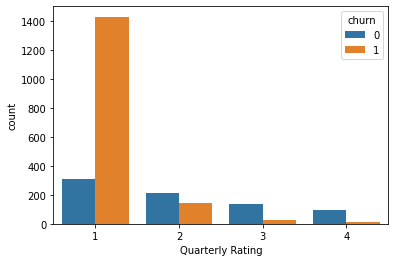

In [1050]:
#visualizing categorical attributes

cat_cols = ['Gender', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating']

for col in cat_cols:
    print(pd.crosstab(df[col], df['churn'], margins=True, normalize='index'))
    sns.countplot(data=df, x=col, hue='churn')
    plt.show()

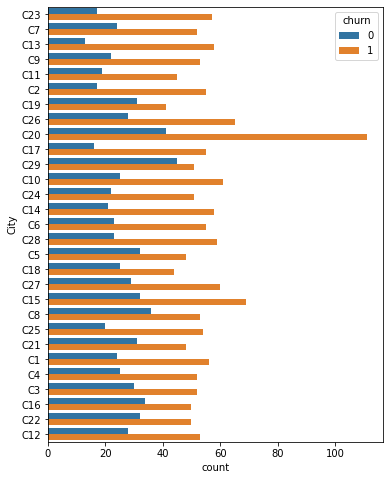

In [1051]:
plt.figure(figsize=(6,8))
sns.countplot(data=df, y='City', hue='churn')
plt.show()

In [1052]:
pd.crosstab(df['City'], df['churn'], margins=True, normalize='index')

churn,0,1
City,,
C1,0.300000,0.700000
C10,0.290698,0.709302
C11,0.296875,0.703125
C12,0.345679,0.654321
C13,0.183099,0.816901
C14,0.265823,0.734177
C15,0.316832,0.683168
C16,0.404762,0.595238
C17,0.225352,0.774648


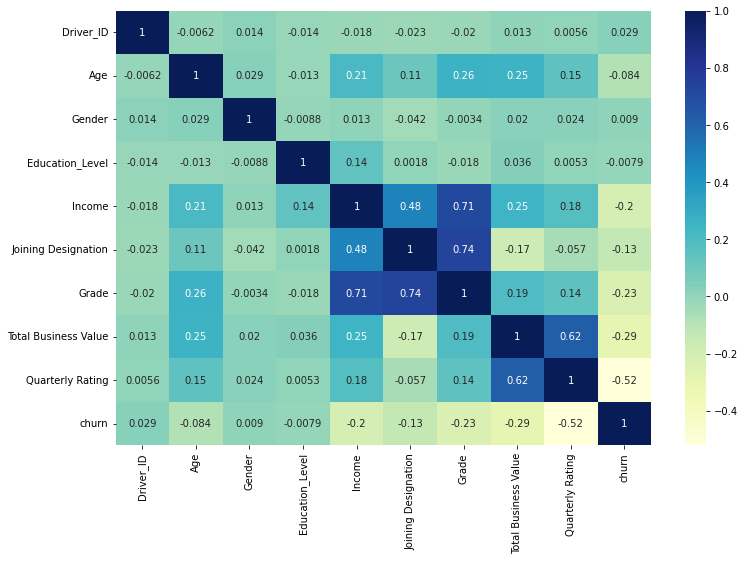

In [1053]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)
plt.show()

## **Observations Based on EDA**

1. 68% of the drivers have churned over the period of two years from 2019 to 2020<br><br>
2. Around 60% of the drivers are male and 40% are female drivers<br><br>
3. City C20 has the highest number of drivers and C11 has the lowest<br><br>
4. There is an equal representation of drivers from different levels of education<br><br>
5. Majority of the drivers have a joining designation 1 and very few people have a designation 5<br><br>
6. Most of the drivers have a grade of either 1 or 2 and people with grade 5 are very less in number<br><br>
7. Over 70% have a last quarterly rating 1 and less than 2% have obtained a rating of 3 or 4<br><br>
8. No significant difference is found in the churning behaviour based on gender and education level<br><br>
9. Joining designation seem to have some impact on churning as people with a designation 3 tend to leave less<br><br>
10. Grade has high impact on churning as over 80% of the drivers with a grade 1 leave the company where only 50-55% of the drivers with grade 3 or above leave<br><br>
11. Quarterly rating has the highest impact on predicting churn as only 18% of the people with a rating 1 stay while 80-90% with a rating 3 or 4 stay<br><br>
12. Churning is the highest in city C13 and the lowest in city C29<br><br>
13. Grade is highly correlated with Income and Job Designation<br><br>
14. Quarterly rating is the feature with the highest correlation with churn<br><br>
15. Average income of those who stay is significantly higher than that of those drivers who leave the company

# **Data Preprocessing**

In [1054]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

### **KNN Imputation**

In [1055]:
#percentage of null values in each column

df.isnull().sum()*100/df.isnull().count()

Driver_ID                0.000000
MMM-YY                   0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         32.129357
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
churn                    0.000000
dtype: float64

*Column LastWorkingDate will be null if the driver hasn't left the company. So, a feature churn is derived from that and no imputation is required. No other feature has null values hence, no need of KNN imputation*

### **Feature Engineering**

In [1056]:
##Creating a column which tells whether the quarterly rating has increased for that driver
##for those whose quarterly rating has increased we assign the value 1

data_new = data.sort_values(by=['Driver_ID', 'MMM-YY'])
df['is_rating_increased'] = np.array((data_new.groupby(by='Driver_ID')['Quarterly Rating'].last() - 
                            data_new.groupby(by='Driver_ID')['Quarterly Rating'].first()))
df['is_rating_increased'] = df['is_rating_increased'].apply(lambda x: 0 if x <= 0 else 1)

In [1057]:
##Target variable creation: Create a column called target which tells whether the driver has left the company
##driver whose last working day is present will have the value 1

#Already created for EDA - Feature churn
df['target'] = df['churn']

In [1058]:
##Create a column which tells whether the monthly income has increased for that driver
##for those whose monthly income has increased we assign the value 1

df['is_monthlyinc_increased'] = np.array((data_new.groupby(by='Driver_ID')['Income'].last() - 
                            data_new.groupby(by='Driver_ID')['Income'].first()))
df['is_monthlyinc_increased'] = df['is_monthlyinc_increased'].apply(lambda x: 0 if x <= 0 else 1)

### **Encoding**

In [1059]:
df['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

In [1060]:
#One Hot Encoding categorical variable City
ohe = OneHotEncoder()

#fit and transform train data
feature_array = ohe.fit_transform(df[['City']]).toarray()
np.hstack(ohe.categories_)

array(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17',
       'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25',
       'C26', 'C27', 'C28', 'C29', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9'], dtype=object)

In [1061]:
feature_labels = np.hstack(ohe.categories_)
features = pd.DataFrame(feature_array, columns=feature_labels)
# features.head()
features.shape

(2381, 29)

In [1062]:
df = pd.concat([df, features], axis=1)
df.drop(columns=['City'], inplace=True)
df.head()

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,...,C27,C28,C29,C3,C4,C5,C6,C7,C8,C9
0,1,2019-03-01,28.0,0.0,2,57387,2018-12-24,2019-03-11,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2020-12-01,31.0,0.0,2,67016,2020-11-06,NaT,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,2020-04-01,43.0,0.0,2,65603,2019-12-07,2020-04-27,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2019-03-01,29.0,0.0,0,46368,2019-01-09,2019-03-07,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,2020-12-01,31.0,1.0,1,78728,2020-07-31,NaT,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Data preparation for modeling and testing**

In [1063]:
df.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'churn',
       'is_rating_increased', 'target', 'is_monthlyinc_increased', 'C1', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2',
       'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'],
      dtype='object')

In [1064]:
df_final = df.drop(columns=['Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'churn'])
df_final.shape

(2381, 40)

In [1065]:
df_final.columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'is_rating_increased', 'target', 'is_monthlyinc_increased', 'C1', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2',
       'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'],
      dtype='object')

In [1066]:
##target variable
y = df_final['target']

##input data
X = df_final.drop(columns=['target'])

In [1067]:
##splitting data into train, cv, test

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.25, random_state=1)

In [1068]:
print(X_train.shape, X_val.shape, X_test.shape)

(1428, 39) (476, 39) (477, 39)


### **Standardization**

In [1069]:
##scaling data
scaler = MinMaxScaler()
scaler.fit(X_train[X_train.columns])
df_train = X_train.copy()
X_train = scaler.transform(X_train[X_train.columns])  # returns numpy.ndarray not df.

##transforming val and test data
X_test = scaler.transform(X_test[X_test.columns])

X_val = scaler.transform(X_val[X_val.columns])

### **Class Imbalance treatment**

In [1070]:
#SMOTE over_sampling for imbalanced data
sm = SMOTE()

In [1071]:
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [1072]:
X_sm.shape

(1954, 39)

# **Model Building**

### **DecisionTreeClassifier**

In [1073]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

In [1074]:
params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

dtc_model = DTC()
clf = GridSearchCV(dtc_model, params, scoring = "accuracy", cv=5)

clf.fit(X_sm, y_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='accuracy')

In [1075]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.7784261263033642 Rank: 8
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.7784261263033642 Rank: 8
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.7804774083546463 Rank: 7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.8055675782018493 Rank: 2
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.8040304282248016 Rank: 4
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.8050573808118564 Rank: 3
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.8117069971801432 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.8019896386648305 Rank: 5
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.7999344219293069 Rank: 6


In [1076]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15)


In [1077]:
dtc_model = clf.best_estimator_

dtc_model.fit(X_sm, y_sm)

print(dtc_model.score(X_test, y_test))

0.80083857442348


### **Ensemble - Bagging Algorithm**

**Random Forest**

In [1078]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import RandomizedSearchCV

In [1079]:
params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

clf.fit(X_sm, y_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [1080]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=7, max_leaf_nodes=20, n_estimators=200,
                       n_jobs=-1)


In [1081]:
rf = clf.best_estimator_

rf.fit(X_sm, y_sm)

print("Model acc",rf.score(X_test, y_test))

Model acc 0.8197064989517819


### **Ensemble - Boosting Algorithm**

**Gradient Boosting**

In [1082]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
import datetime as dt

start = dt.datetime.now()
gbc = GBC(n_estimators=150, learning_rate=0.2, max_depth=4, random_state=0).fit(X_sm, y_sm)
end = dt.datetime.now()

print(f"Time taken for training : {end - start}\nTraining accuracy:{gbc.score(X_sm, y_sm)}\nTest Accuracy: {gbc.score(X_test, y_test)}")

Time taken for training : 0:00:00.732172
Training accuracy:0.9872057318321392
Test Accuracy: 0.80083857442348


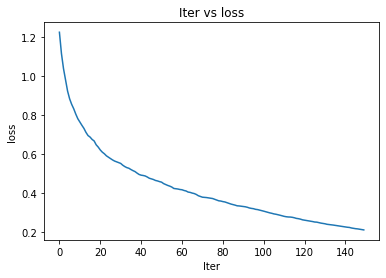

In [1083]:
plt.plot(gbc.train_score_)

plt.xlabel('Iter')
plt.ylabel('loss')
plt.title('Iter vs loss')
plt.show()

**XGBoost**

In [1084]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import datetime as dt

In [1085]:
params = {
        'learning_rate': [0.06, 0.1, 0.2, 0.4, 0.6],
        'subsample': [0.3, 0.4, 0.6, 0.8],
        'colsample_bytree': [0.3, 0.4, 0.6, 0.8],
        'max_depth': [3, 4, 5],
        'n_estimators': [125, 150, 175]
        }
xgb = XGBClassifier(silent=True)

In [1086]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

grid_search = GridSearchCV(xgb, params, scoring='accuracy', n_jobs=-1, cv=skf.split(X_sm,y_sm))


start = dt.datetime.now()
grid_search.fit(X_sm, y_sm)
end = dt.datetime.now()

In [1087]:
print('\n Best hyperparameters:')
print(grid_search.best_params_)


 Best hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.06, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


In [1088]:
best_xgb = XGBClassifier(n_estimators=175, subsample=0.6, max_depth=5, learning_rate=0.06, colsample_bytree=0.6, silent=True)
best_xgb.fit(X_sm, y_sm)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.06, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=175, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=0.6, tree_method=None, validate_parameters=False,
              verbosity=None)

In [1089]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_sm, y_sm)}\nTest Accuracy: {best_xgb.score(X_test, y_test)}")

Time taken for training : 0:03:47.796244
Training accuracy:0.9196519959058342
Test Accuracy: 0.8218029350104822


### **Feature Importance**

[0.01843571 0.02875685 0.02912733 0.01698088 0.05219487 0.04907594
 0.02892354 0.1253906  0.10134501 0.02645308 0.01735362 0.02018533
 0.01142109 0.00992452 0.02367815 0.01952606 0.01674458 0.01810396
 0.0163741  0.01840518 0.01875165 0.01429379 0.01624138 0.02330503
 0.01723162 0.01551516 0.01789555 0.02391636 0.02046102 0.01392226
 0.01418739 0.02203643 0.01890856 0.0164425  0.01768811 0.01440419
 0.02186519 0.02108886 0.02344452]


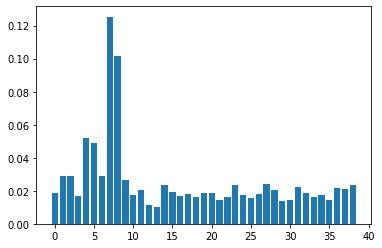

In [1090]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

In [1091]:
df_final.columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'is_rating_increased', 'target', 'is_monthlyinc_increased', 'C1', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2',
       'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'],
      dtype='object')

#### **Important Features**

1. Recent Quarterly Rating
2. Increase in Quareterly rating
3. Joining Designation
4. Grade

### **Summary of Models and Test Accuracies**

**1. Decision Tree**

In [1092]:
dtc_model

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15)

In [1093]:
dtc_model.score(X_test, y_test)

0.80083857442348

**2. Random Forest**

In [1094]:
rf

RandomForestClassifier(max_depth=7, max_leaf_nodes=20, n_estimators=200,
                       n_jobs=-1)

In [1095]:
rf.score(X_test, y_test)

0.8197064989517819

**3. Gradient boost**

In [1096]:
gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=150,
                           random_state=0)

In [1097]:
gbc.score(X_test, y_test)

0.80083857442348

**4. XGBoost**

In [1098]:
best_xgb

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.06, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=175, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=0.6, tree_method=None, validate_parameters=False,
              verbosity=None)

In [1099]:
best_xgb.score(X_test, y_test)

0.8218029350104822

# **Results Evaluation**

In [1100]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc

In [1101]:
def results(model):
    
    #variable data will store y, probability and y_pred
    data = pd.DataFrame(y_test.copy())
    data.rename(columns={'target': 'y'}, inplace=True)
    data.reset_index(inplace=True)
    data.drop(columns=['index'], inplace=True)
    data['proba'] = model.predict_proba(X_test)[:, 1]
    data['y_pred'] = model.predict(X_test)
    print(data.head())
    print()
    
    #classification report
    print('Classification Report')
    cm = confusion_matrix(data['y'], data['y_pred'])
    print(cm)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    print()
    
    # Accuracy
    acc = np.diag(cm).sum()/cm.sum()
    print('Accuracy = ', acc)

    #ROC AUC curve
    fpr, tpr, thres = roc_curve(data['y'], data['proba'])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr)
    plt.title("ROC curve")
    plt.show()
    
    #ROC AUC Score
    score = roc_auc_score(data['y'], data['proba'])
    print('ROC AUC Score', score)
    
    return(data)
    

## **Classification Report and ROC AUC curve**

#### **1. Decision Tree**

   y     proba  y_pred
0  0  0.687500       1
1  1  0.887133       1
2  1  0.887133       1
3  1  0.116473       0
4  0  0.895028       1

Classification Report
[[ 83  65]
 [ 30 299]]


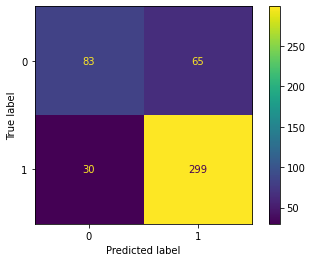


Accuracy =  0.80083857442348


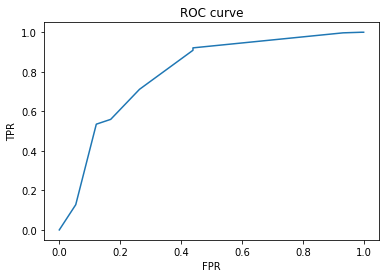

ROC AUC Score 0.7945863796927626


In [1102]:
## Decision Tree

dt_pred = results(dtc_model)

#### **2. Random Forest**

   y     proba  y_pred
0  0  0.714075       1
1  1  0.786600       1
2  1  0.801212       1
3  1  0.373270       0
4  0  0.684801       1

Classification Report
[[ 94  54]
 [ 32 297]]


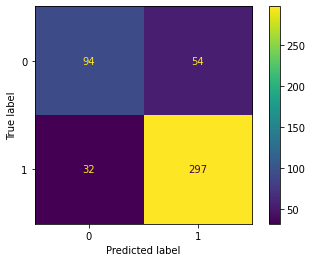


Accuracy =  0.8197064989517819


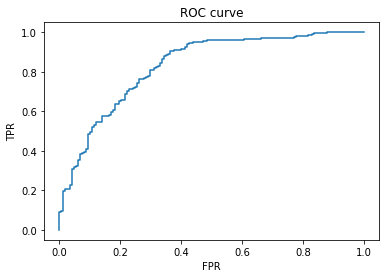

ROC AUC Score 0.829273802678058


In [1103]:
## Random Forest

rf_pred = results(rf)

#### **3. Gradient Boost**

   y     proba  y_pred
0  0  0.955869       1
1  1  0.961343       1
2  1  0.967639       1
3  1  0.874478       1
4  0  0.929648       1

Classification Report
[[ 96  52]
 [ 43 286]]


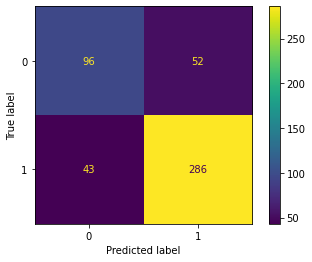


Accuracy =  0.80083857442348


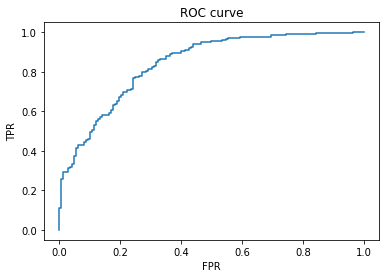

ROC AUC Score 0.8411443358251869


In [1104]:
## Gradient Boost

gbc_pred = results(gbc)

#### **4. XGBoost**

   y     proba  y_pred
0  0  0.842263       1
1  1  0.921066       1
2  1  0.778124       1
3  1  0.701307       1
4  0  0.915280       1

Classification Report
[[ 92  56]
 [ 29 300]]


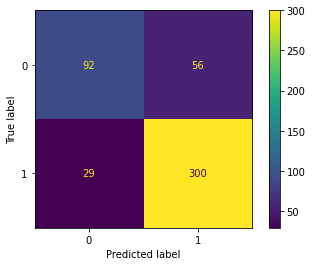


Accuracy =  0.8218029350104822


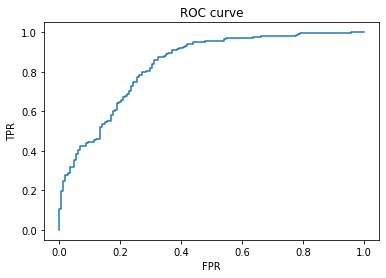

ROC AUC Score 0.8355582025794792


In [1106]:
## XGBoost

xgb_pred = results(best_xgb)

### **Results**

1. Decision Tree
    - Accuarcy: 80.08%
    - ROC AUC Score: 79.46%
<br>
2. Random Forest
    - Accuarcy: 81.97%
    - ROC AUC Score: 82.93%
<br>
3. Gradient Boost
    - Accuarcy: 80.08%
    - ROC AUC Score: 84.11
<br>
4. XGBoost
    - Accuarcy: 82.18%
    - ROC AUC Score: 83.56%

# **Actionable Insights**


1. Joining designation has some impact on churning and people with a designation 3 tend to leave less compared to other designations<br><br>
2. Grade has a high impact on churning as over 80% of the drivers with a grade of 1 leave the company whereas only 50-55% of the drivers with a grade of 3 or above left<br><br>
3. The quarterly rating has the highest impact on predicting churn as only 18% of the people with a rating of 1 stay while 80-90% with a rating of 3 or 4 stay<br><br>
4. Churning is the highest in cities C13, C17, and C23 and the lowest in city C29<br><br>
5. Based on models, features having the highest impact on prediction are Quarterly Rating, Joining Designation, and Grade<br><br>
6. The average income of those who stay is significantly higher than that of those drivers who leave the company

# **Recommendations**

1. Providing a grade of 3 or above will help reduce the churn rate as the percentage of drivers leaving the company is highest among those who have a grade of 1 or 2<br><br>
2. The majority of the drivers have a joining designation of 1, 2 or 3 so, going liberal with the designation could help retain more drivers as those who have a designation of 3 have the least churn rate<br><br>
3. Incentives can be arranged based on the quarterly rating of a driver as it is the single most important feature determining whether a person is going to leave or stay<br><br>
4. A greater percentage of commission or bonuses can be given to drivers who are based in cities C13, C17, and C29 as these are the cities having the highest churn rate<br><br>
5. As expected, those who generate more income stay for a longer time hence, providing more commission or a good revenue sharing model will help retain drivers